### 关于house_price_predict的笔记修正

* 导入必要的库

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

* 导入数据

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

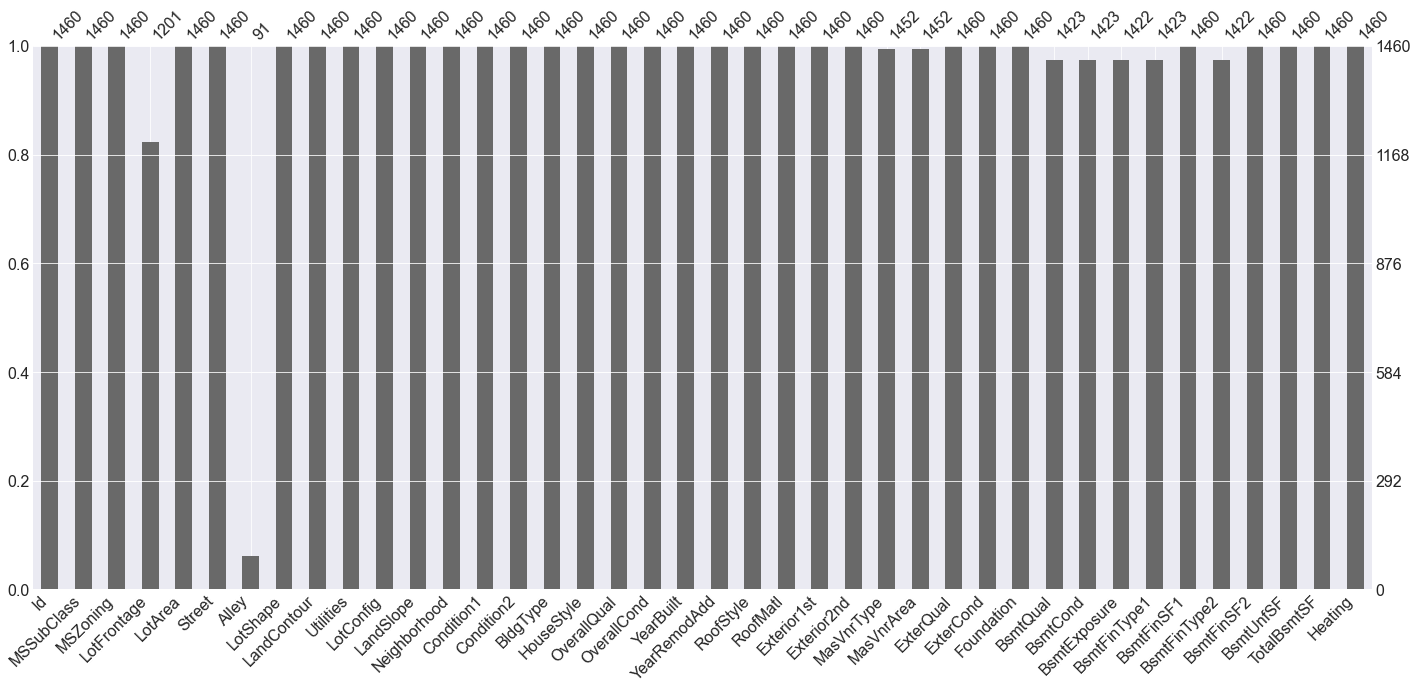

In [8]:
msno.bar(train.iloc[:, :40])

* 使用msno.bar绘制确实值图像

<AxesSubplot:>

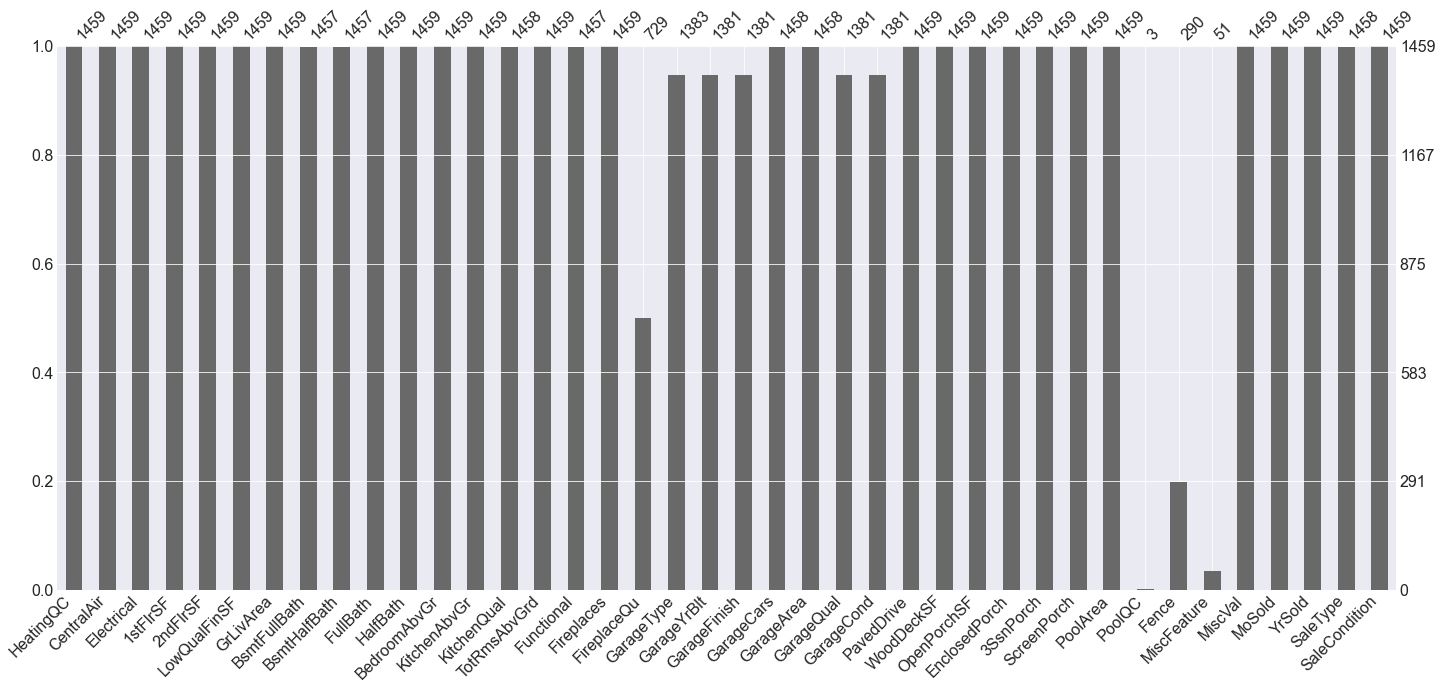

In [10]:
msno.bar(test.iloc[:, 40:])

In [11]:
train.iloc[:, :40].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000


In [12]:
train.iloc[:, 40:-1].describe()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [14]:
pd.DataFrame(train['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


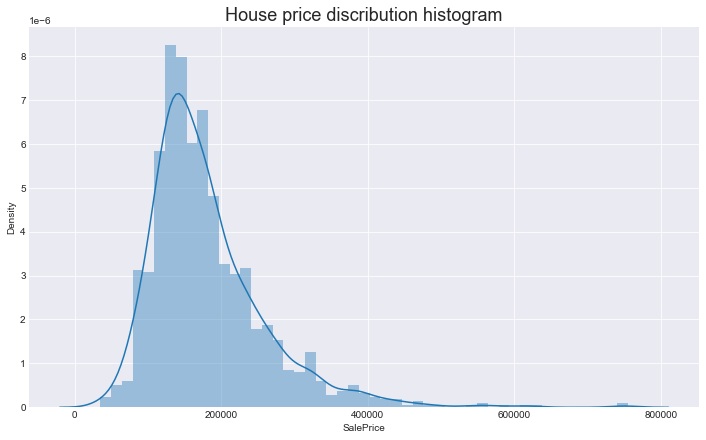

In [20]:
plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice'])
plt.title('House price discribution histogram', fontsize=18)
plt.show()

In [21]:
train['SalePrice'] = np.log1p(train['SalePrice'])

c:\users\hp2\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


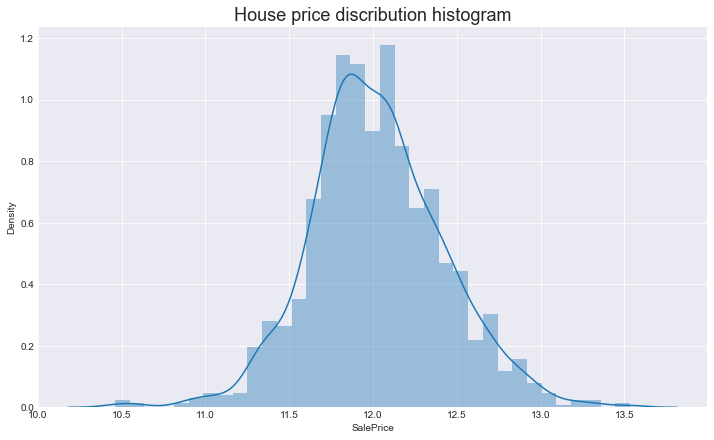

In [22]:
plt.figure(figsize=(12, 7))

sns.distplot(train['SalePrice'])
plt.title('House price discribution histogram', fontsize=18)
plt.show()

> np.log1p(X) = np.log(X + 1)  
> np.expm1(X) = np.exp(X) - 1

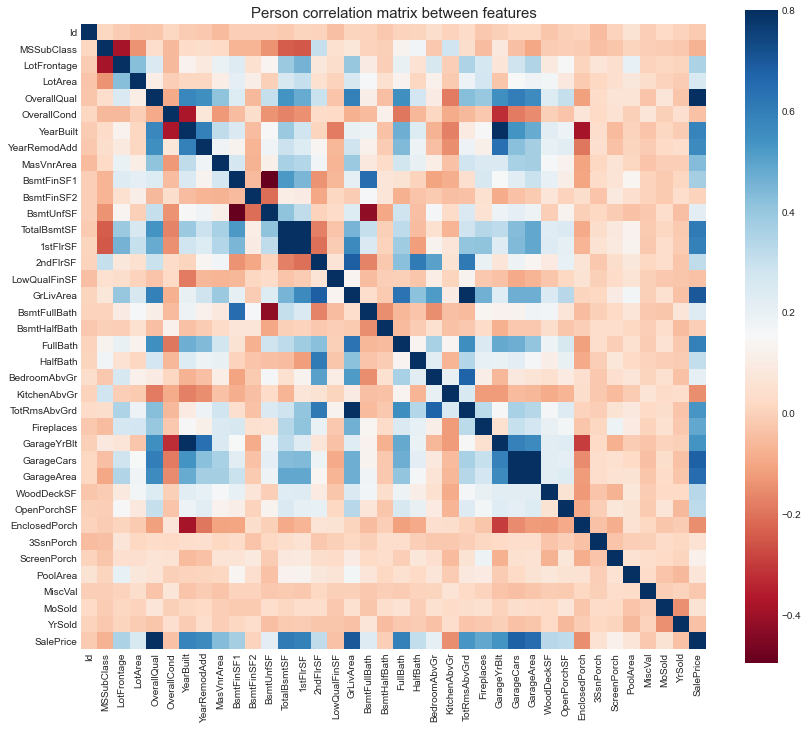

In [33]:
corr_train = train.corr()

colormap = plt.cm.RdBu

plt.figure(figsize=(14, 12))
plt.title('Person correlation matrix between features', y=1, size=15)
sns.heatmap(corr_train, vmax=0.8, square=True, cmap=colormap)
plt.show()

* corr()这是打印相关性系数的一个参数，可以输出不同变量之间的相关性系数，corr()是square的，而corrwith()是Series类型的

* 观察最后一列就可以得到相关系数较高的变量名称

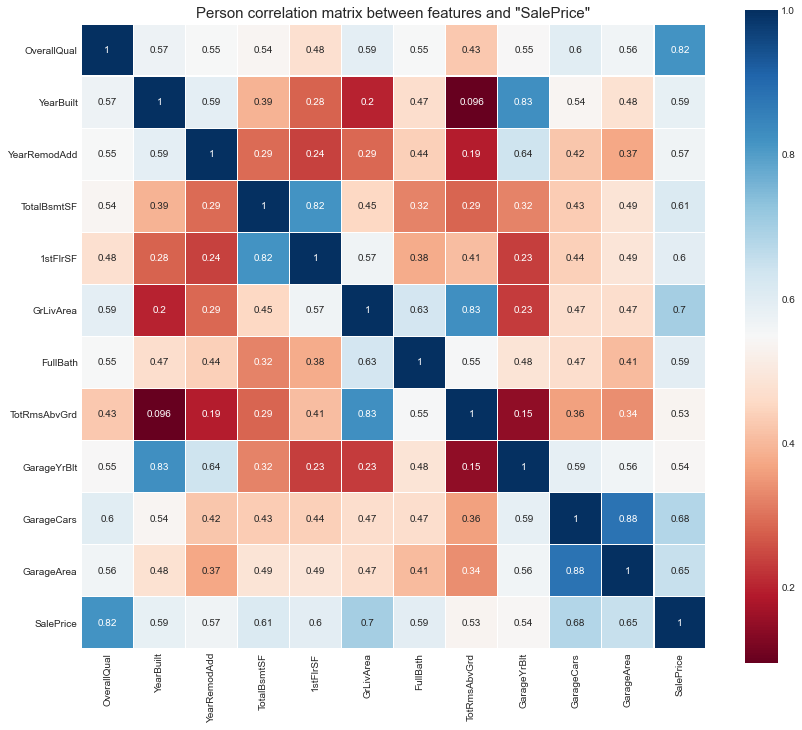

In [42]:
highest_corr_features = corr_train.index[
    abs(corr_train['SalePrice']) > 0.5
    # 获得相关性大于0.5的所有的列名称
    # 获取index
]

plt.figure(figsize=(14, 12))
plt.title('Person correlation matrix between features and "SalePrice"', y=1, size=15)
sns.heatmap(train[highest_corr_features].corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap, linecolor='white', annot=True)
# 输出哪些列的相关性
plt.show()

* 可以很容易发现最后一行的相关性系数非常明显

* 这就是我们需要找的哪些变量

In [43]:
SalePrice = pd.DataFrame(corr_train['SalePrice'].sort_values(ascending=False))
SalePrice

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


* 打印相关性较高的

<Figure size 3000x2000 with 0 Axes>

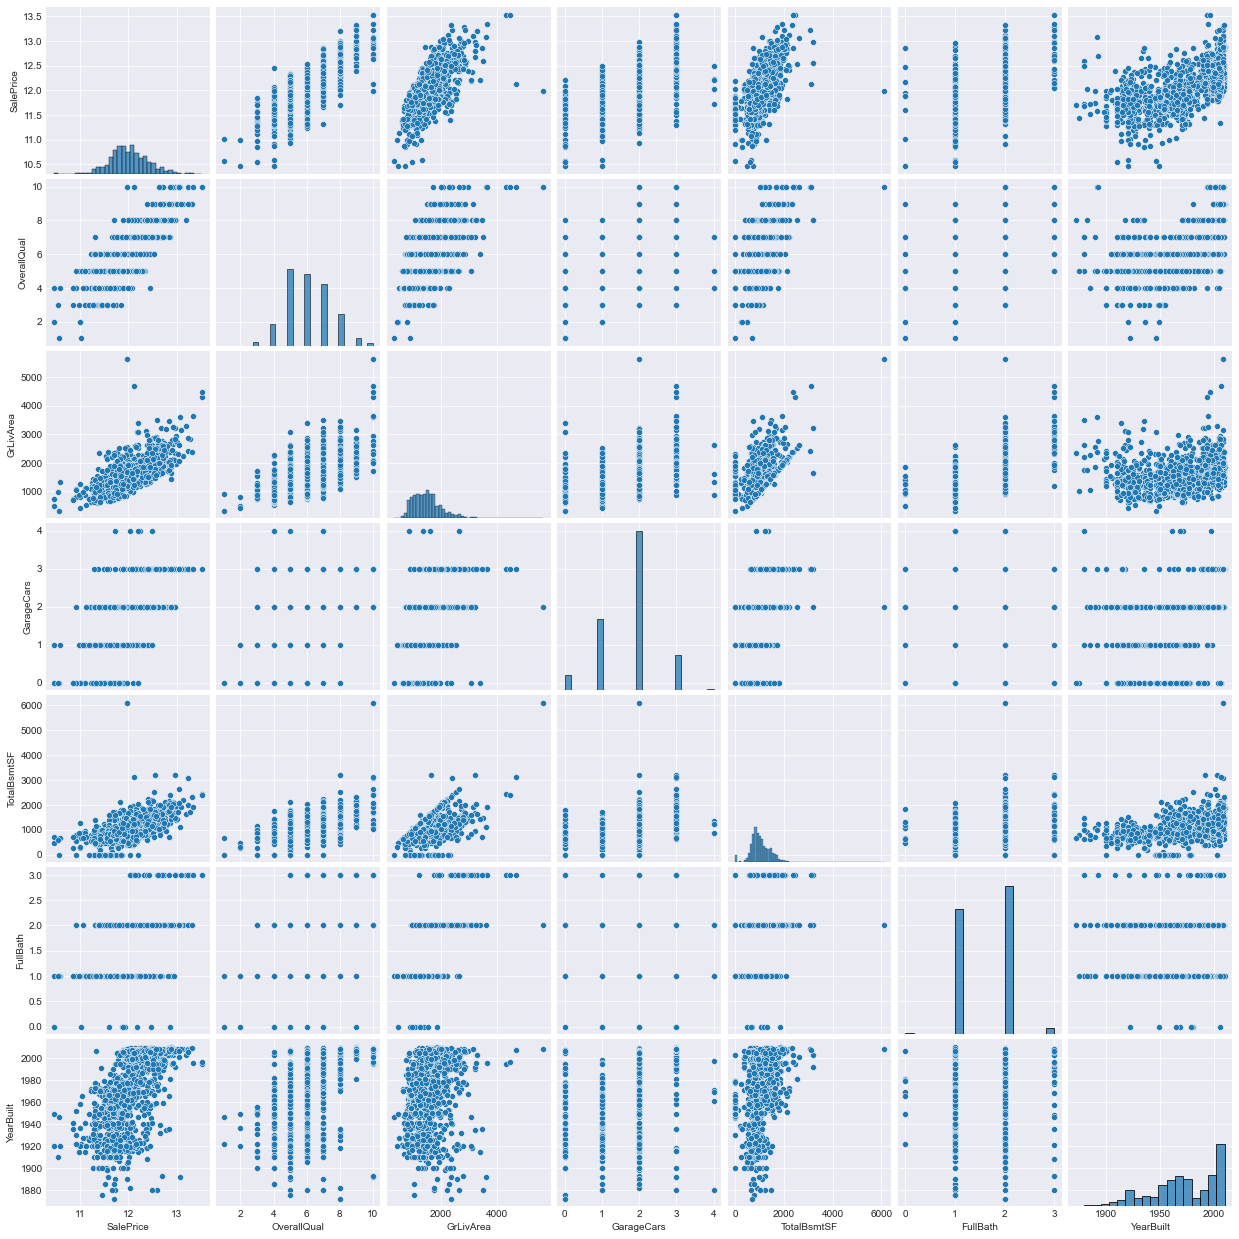

In [46]:
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
           'YearBuilt']
plt.figure(dpi=500)
sns.pairplot(train[features])
plt.show()

In [47]:
y_train = train['SalePrice']
test_id = test['Id']
data = pd.concat([train, test], axis=0, sort=False)
data = data.drop(['Id', 'SalePrice'], axis=1)


In [48]:
Total = data.isnull().sum().sort_values(ascending=False)

In [54]:
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
# 缺失值的数量除以总共值的数量
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
...,...,...
1stFlrSF,0,0.000000
CentralAir,0,0.000000
Heating,0,0.000000
Foundation,0,0.000000


In [55]:
data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
data.isnull().sum().max()

4

In [56]:
# numeric data
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    data[feature].fillna(0, inplace=True)

In [57]:
# categorical data
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [58]:
data['Functional'].fillna('Typ', inplace=True)
data.isnull().sum().max()

2

In [59]:
from scipy.stats import skew

In [61]:
numeric = data.dtypes[data.dtypes != 'object'].index
skewed = data[numeric].apply(lambda col: skew(col)).sort_values(ascending=False)
skewed = skewed[abs(skewed) > 0.5]

for feature in skewed.index:
    data[feature] = np.log1p(data[feature])

In [62]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [63]:
data = pd.get_dummies(data)
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,2.306780,7,1.026672,2.152099,2003,2.023008,0.0,1.794635,2.048136,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,2.319405,6,1.162283,2.150521,1976,2.065156,0.0,1.894991,2.096943,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,2.334879,7,1.026672,2.151983,2002,1.972450,0.0,1.956616,2.057383,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,2.318892,7,1.026672,2.146866,1970,1.853152,0.0,1.986972,2.032004,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,2.357574,8,1.026672,2.151925,2000,2.013056,0.0,1.973587,2.084931,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,2.148139,4,1.124748,2.150167,1970,0.000000,0.0,1.988484,1.988484,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,2.145577,4,1.026672,2.150167,1970,1.876926,0.0,1.900162,1.988484,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,2.389087,5,1.124748,2.149575,1996,2.093184,0.0,0.000000,2.093184,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,2.327628,5,1.026672,2.151459,1992,1.920306,0.0,1.995531,2.056267,...,0,0,0,1,0,0,0,0,1,0


In [65]:
data.isnull().sum().max()

0

In [66]:
X_train = data[:len(y_train)]
X_test = data[len(y_train):]

In [67]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [69]:
import xgboost as XGB

In [71]:
xgb_model = XGB.XGBRegressor(colsample_btree=0.4603, gamma=0.0468,
                            learning_rate=0.05, max_depth=3,
                            min_child_width=1.781, n_estimators=200,
                            reg_alpha=0.4640, reg_lambda=0.8571, 
                            subsample=0.5213, random_state=7, nthread=-1)
xgb_model.fit(X_train, y_train)


[11:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_btree, min_child_width } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_btree=0.4603,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.0468, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, min_child_width=1.781,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=12, nthread=-1, num_parallel_tree=1, random_state=7,
             reg_alpha=0.464, reg_lambda=0.8571, scale_pos_weight=1,
             subsample=0.5213, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [72]:
y_predict = np.floor(np.expm1(xgb_model.predict(X_test)))
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv('submission.csv', index=False)

* 总结
    * 使用热图相关性系数挑选变量
    * 缺失值太多的可以去除掉
    * 使用可视化工具可以加强表现力
    * xgboost是个好算法，竞赛永远的神